In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *

Go to [Google Images](http://images.google.com) and search for the images you are interested in. The more specific you are in your Google Search, the better the results and the less manual pruning you will have to do.

Scroll down until you've seen all the images you want to download, or until you see a button that says 'Show more results'. All the images you scrolled past are now available to download. To get more, click on the button, and continue scrolling. The maximum number of images Google Images shows is 700.

It is a good idea to put things you want to exclude into the search query, for instance if you are searching for the Eurasian wolf, "canis lupus lupus", it might be a good idea to exclude other variants:

    "canis lupus lupus" -dog -arctos -familiaris -baileyi -occidentalis

You can also limit your results to show only photos by clicking on Tools and selecting Photos from the Type dropdown.

### Download into file

Now you must run some Javascript code in your browser which will save the URLs of all the images you want for you dataset.

Press <kbd>Ctrl</kbd><kbd>Shift</kbd><kbd>J</kbd> in Windows/Linux and <kbd>Cmd</kbd><kbd>Opt</kbd><kbd>J</kbd> in Mac, and a small window the javascript 'Console' will appear. That is where you will paste the JavaScript commands.

You will need to get the urls of each of the images. You can do this by running the following commands:

```javascript
urls = Array.from(document.querySelectorAll('.rg_di .rg_meta')).map(el=>JSON.parse(el.textContent).ou);
window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));
```

### Create directory and upload urls file into your server

In [3]:
import os

In [4]:
os.getcwd()

'/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar'

In [5]:
path = Path('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/')

In [6]:
path

PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data')

Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.

### Definindo o diretório das imagens e realizando o download atraves dos links gerados no passo anterior

Primeiro passo para o download das imagens, definir o nome da pasta
Utilizar um nome sugestivo pois o nome da pasta será a classe das imagens que serão utilizadas para o treinamento e teste do modelo.
Repetir as duas próximas celular juntamente com as celular onde definimos as classes `Categorias`e a celula que realiza o download das imagens.

A celula abaixo define a pasta `folder` e o arquivo que contém os links para as imagens

In [6]:
#Passo 1 para download das imagens
folder = 'stratocaster'
file = 'stratocaster_link.txt'

In [7]:
path = Path('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [8]:
#Passo 4 para downloa das imagens
#Esta função recebe  o caminho dos arquivos com os links, define a pasta de destino,
#e a limite de imagens a serem baixadas
download_images(path/file, dest, max_pics=500)

In [9]:
folder = 'telecaster'
file = 'telecaster_link.txt'

In [10]:
path = Path('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [11]:
#Passo 4 para downloa das imagens
#Esta função recebe  o caminho dos arquivos com os links, define a pasta de destino,
#e a limite de imagens a serem baixadas
download_images(path/file, dest, max_pics=500)

In [12]:
folder = 'lespaul'
file = 'lespaul_link.txt'

In [13]:
path = Path('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/')
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [14]:
#Passo 4 para downloa das imagens
#Esta função recebe  o caminho dos arquivos com os links, define a pasta de destino,
#e a limite de imagens a serem baixadas
download_images(path/file, dest, max_pics=500)

A celula acima pega o nome da pasta e verifica se já existe o diretório, caso não existe vai criar o diretório para receber as imagens no passo do download, define ainda o endereço da pasta como o atributo de destino `dest` que deverá ser indicado na função que faz o downloa das imagens.

Como se pode ver nas 6 celular acima o passo deve ser repetido para cada categoria.
Prestar atenção na sequencia dos passos para o downloa das imagens.
seguir os passos 1, 2 e 3 para cada `categoria`

You will need to run this cell once per each category.

In [7]:
path.ls()

[PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/telecaster_link_old.txt'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/export.pkl'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/telecaster_link.txt'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/telecaster'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/stratocaster_link_old.txt'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/models'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/stratocaster'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/lespaul_link.txt'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/stratocaster_link.txt'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/cleaned.csv'),
 PosixPath('/home/cid/Documentos/Desenvolvimento/wmg/whatsmyguitar/data/lespaul')]

## Download das images

Now you will need to download your images from their respective urls.

fast.ai has a function that allows you to do just that. You just have to specify the urls filename as well as the destination folder and this function will download and save all images that can be opened. If they have some problem in being opened, they will not be saved.

Let's download our images! Notice you can choose a maximum number of images to be downloaded. In this case we will not download all the urls.

You will need to run this line once for every category.

In [16]:
#Passo 4 para downloa das imagens
#Esta função recebe  o caminho dos arquivos com os links, define a pasta de destino,
#e a limite de imagens a serem baixadas
#download_images(path/file, dest, max_pics=350)

In [17]:
#Passo 5, este é um passo extra caso hajam problemas para a realização do Download
#este passo com a inclusão o parametro max_workers=0 soluciona erro comuns em ambiente Windows
#O atributo max_workers=0 também deve ser utilizado na criação ImageDataBunch em ambientes Windows

# If you have problems download, try with `max_workers=0` to see exceptions:
#descomentar a linha abaixo e executar ao inves da função na celular anterior.

#download_images(path/file, dest, max_pics=30, max_workers=0)

Then we can remove any images that can't be opened:

### Removendo as imagens que não puderem ser abertas

In [8]:
#Definindo as classes
#Utilizar o mesmo nome dos diretórios criados com o passo 1 do download das imagens
classes = ['telecaster','stratocaster', 'lespaul']

In [9]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

### Dataset preparado, as imagens podem ser abertas sem problemas

## View data

## Visualizando uma amostra das imagens

In [10]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2, bs=16,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [11]:
#usar esta celular caso realizado o limpeza dos dados com a função ImageCleaner
# If you already cleaned your data, run this cell instead of the one before
#np.random.seed(42)
#data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
#        ds_tfms=get_transforms(), size=224, num_workers=4, no_check=True).normalize(imagenet_stats)

Good! Let's take a look at some of our pictures then.

In [12]:
data.classes

['lespaul', 'stratocaster', 'telecaster']

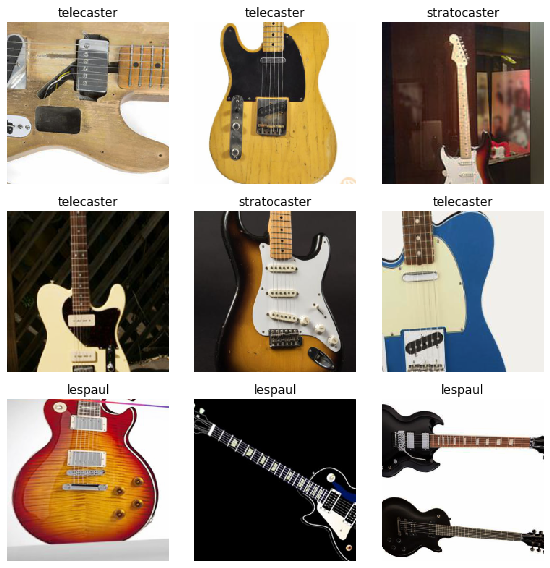

In [13]:
data.show_batch(rows=3, figsize=(8,8))

### Verificando as `categorias` e o tamanho dos datasets (`treino`, e `validação`)

In [14]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lespaul', 'stratocaster', 'telecaster'], 3, 1108, 276)

## Train model

### Treinando o modelo utilizando a ResNET34

In [15]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [16]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.026966,0.400111,0.851449,02:16
1,0.705522,0.366164,0.865942,02:05
2,0.586808,0.279363,0.913043,02:07
3,0.477130,0.265512,0.913043,02:03
4,0.381735,0.256824,0.920290,02:17


In [17]:
#salvando o estado do treinamento caso precise utiliza-lo novamente
learn.save('stage-1')

In [18]:
#descongelando as primeiras camadas da rede neural
learn.unfreeze()

In [19]:
#Avaliando a curva de aprendizado
learn.lr_find(stop_div=False, num_it=15)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


Failed to compute the gradients, there might not be enough points.


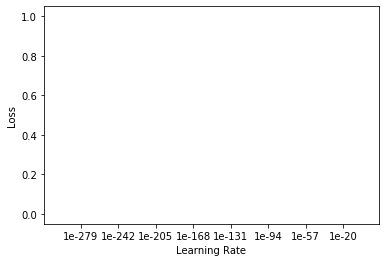

In [20]:
#Avaliando a melhor taxa de aprendizagem com marcação da sugestão para a melhor taxa de aprendizado
learn.recorder.plot(suggestion=True)

In [21]:
#Treinando o modelo novamente definindo 
learn.fit_one_cycle(5, max_lr=slice(1e-04))

epoch,train_loss,valid_loss,accuracy,time
0,0.422658,0.243948,0.920290,03:17
1,0.373339,0.207958,0.942029,02:55
2,0.321987,0.187551,0.927536,02:56
3,0.296776,0.177773,0.949275,02:55
4,0.271196,0.176076,0.949275,02:59


In [22]:
#salvando o estado do modelo caso seja necessário reutiliza-lo
learn.save('stage-2')

In [ ]:
#Treinando o modelo novamente definindo 
learn.fit_one_cycle(5, max_lr=slice(1e-03))

In [ ]:
#salvando o estado do modelo caso seja necessário reutiliza-lo
learn.save('stage-')

## Interpretation

## Interpretando os resultados

In [23]:
#Carregando o modelo salvo anteriormente
learn.load('stage-2');

In [24]:
interp = ClassificationInterpretation.from_learner(learn)

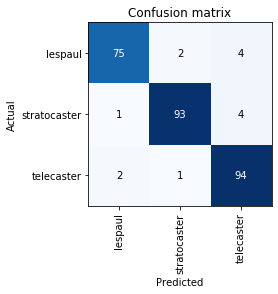

In [25]:
#Exibindo a matriz de confusão - essa matriz demonstra os erros e os acertos do modelo
interp.plot_confusion_matrix()

## Cleaning Up

Some of our top losses aren't due to bad performance by our model. There are images in our data set that shouldn't be.

Using the `ImageCleaner` widget from `fastai.widgets` we can prune our top losses, removing photos that don't belong.

## Limpando os dados

In [26]:
from fastai.widgets import *

First we need to get the file paths from our top_losses. We can do this with `.from_toplosses`. We then feed the top losses indexes and corresponding dataset to `ImageCleaner`.

Notice that the widget will not delete images directly from disk but it will create a new csv file `cleaned.csv` from where you can create a new ImageDataBunch with the corrected labels to continue training your model.

Tradução automatica (by Google translator)

Primeiro, precisamos obter os caminhos de arquivo de nossos top_losses. Nós podemos fazer isso com .from_toplosses. Em seguida, alimentamos os principais índices de perdas e o conjunto de dados correspondente para o ImageCleaner.

Observe que o widget não excluirá imagens diretamente do disco, mas criará um novo arquivo csv cleaned.csv, de onde você poderá criar um novo ImageDataBunch com os rótulos corrigidos para continuar treinando seu modelo.

In order to clean the entire set of images, we need to create a new dataset without the split. The video lecture demostrated the use of the `ds_type` param which no longer has any effect. See [the thread](https://forums.fast.ai/t/duplicate-widget/30975/10) for more details.

Para limpar todo o conjunto de imagens, precisamos criar um novo conjunto de dados sem a divisão. A palestra de vídeo demonstrou o uso do parâmetro ds_type, que não tem mais efeito algum. Veja o tópico para mais detalhes.

In [27]:
db = (ImageList.from_folder(path)
                   .split_none()
                   .label_from_folder()
                   .transform(get_transforms(), size=224)
                   .databunch()
     )

In [ ]:
# If you already cleaned your data using indexes from `from_toplosses`,
# run this cell instead of the one before to proceed with removing duplicates.
# Otherwise all the results of the previous step would be overwritten by
# the new run of `ImageCleaner`.
#utilizar essa celula ao inves da anterior caso ja tenha realizado limepza dos top_losses
#rodar esta celular antes de proceder para a remoção das celular duplicadas


db = (ImageList.from_csv(path, 'cleaned.csv', folder='.')
                    .split_none()
                    .label_from_df()
                    .transform(get_transforms(), size=224)
                    .databunch()
      )

Then we create a new learner to use our new databunch with all the images.

In [28]:
learn_cln = cnn_learner(db, models.resnet34, metrics=error_rate)

learn_cln.load('stage-2');

In [29]:
ds, idxs = DatasetFormatter().from_toplosses(learn_cln)

Make sure you're running this notebook in Jupyter Notebook, not Jupyter Lab. That is accessible via [/tree](/tree), not [/lab](/lab). Running the `ImageCleaner` widget in Jupyter Lab is [not currently supported](https://github.com/fastai/fastai/issues/1539).

In [30]:
ImageCleaner(ds, idxs, path)

'No images to show :)'

Flag photos for deletion by clicking 'Delete'. Then click 'Next Batch' to delete flagged photos and keep the rest in that row. `ImageCleaner` will show you a new row of images until there are no more to show. In this case, the widget will show you images until there are none left from `top_losses.ImageCleaner(ds, idxs)`

Marque as fotos para exclusão clicando em "Excluir". Em seguida, clique em "Próximo lote" para excluir fotos sinalizadas e mantenha o restante nessa linha. O ImageCleaner mostrará uma nova linha de imagens até que não haja mais nada para mostrar. Nesse caso, o widget mostrará imagens até que não haja mais nada de top_losses.ImageCleaner (ds, idxs)

You can also find duplicates in your dataset and delete them! To do this, you need to run `.from_similars` to get the potential duplicates' ids and then run `ImageCleaner` with `duplicates=True`. The API works in a similar way as with misclassified images: just choose the ones you want to delete and click 'Next Batch' until there are no more images left.

Você também pode encontrar duplicatas no seu conjunto de dados e excluí-las! Para fazer isso, você precisa executar .from_similars para obter os ids de duplicatas em potencial e, em seguida, executar o ImageCleaner com duplicatas = True. A API funciona de maneira semelhante à das imagens classificadas erroneamente: basta escolher as que você deseja excluir e clicar em "Próximo lote" até que não haja mais imagens.

Make sure to recreate the databunch and `learn_cln` from the `cleaned.csv` file. Otherwise the file would be overwritten from scratch, loosing all the results from cleaning the data from toplosses.

Lembre-se de recriar o banco de dados e o learn_cln no arquivo cleaned.csv. Caso contrário, o arquivo seria substituído do zero, perdendo todos os resultados da limpeza dos dados de toplosses.

In [31]:
#prepara para verificar imagens duplicadas
ds, idxs = DatasetFormatter().from_similars(learn_cln)

Getting activations...


Computing similarities...


In [32]:
#rodar apenas para identificar imagens duplicadas
ImageCleaner(ds, idxs, path, duplicates=True)

'No images to show :). 507 pairs were skipped since at least one of the images was deleted by the user.'

Remember to recreate your ImageDataBunch from your `cleaned.csv` to include the changes you made in your data!

Lembre-se de recriar seu ImageDataBunch de seu clean.csv para incluir as alterações feitas nos seus dados!

## Putting your model in production

### Colocando o modelo em produção

First thing first, let's export the content of our `Learner` object for production:

Primeiro, vamos exportar o conteúdo do nosso objeto Learner para produção:

In [33]:
learn.export()

This will create a file named 'export.pkl' in the directory where we were working that contains everything we need to deploy our model (the model, the weights but also some metadata like the classes or the transforms/normalization used).

Isso criará um arquivo chamado 'export.pkl' no diretório em que estávamos trabalhando, que contém tudo o que precisamos para implantar nosso modelo (o modelo, os pesos, mas também alguns metadados como as classes ou as transformações / normalizações usadas).

You probably want to use CPU for inference, except at massive scale (and you almost certainly don't need to train in real-time). If you don't have a GPU that happens automatically. You can test your model on CPU like so:

Você provavelmente quer usar a CPU para inferência, exceto em escala maciça (e você quase certamente não precisa treinar em tempo real). Se você não tem uma GPU que acontece automaticamente. Você pode testar seu modelo na CPU da seguinte forma:

## Testando o modelo em produção

### Como vamos utilizar apenas uma imagem para teste não é necessário utilização da GPU

In [34]:
defaults.device = torch.device('cpu')

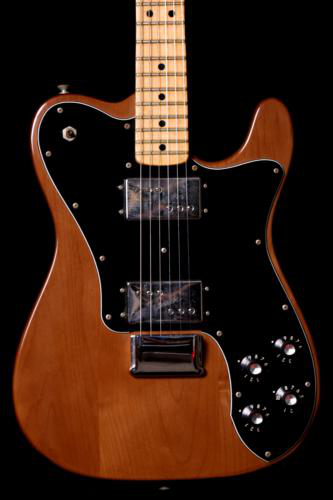

In [35]:
img = open_image(path/'telecaster'/'00000085.jpg')
img

We create our `Learner` in production enviromnent like this, jsut make sure that `path` contains the file 'export.pkl' from before.

Criamos o nosso Learner no ambiente de produção como este, apenas certifique-se de que o caminho contenha o arquivo 'export.pkl' de antes.

In [36]:
learn = load_learner(path)

In [37]:
pred_class,pred_idx,outputs = learn.predict(img)
print('Sua guitarra é uma: ', pred_class)

Sua guitarra é uma:  telecaster


So you might create a route something like this ([thanks](https://github.com/simonw/cougar-or-not) to Simon Willison for the structure of this code):

```python
@app.route("/classify-url", methods=["GET"])
async def classify_url(request):
    bytes = await get_bytes(request.query_params["url"])
    img = open_image(BytesIO(bytes))
    _,_,losses = learner.predict(img)
    return JSONResponse({
        "predictions": sorted(
            zip(cat_learner.data.classes, map(float, losses)),
            key=lambda p: p[1],
            reverse=True
        )
    })
```

(This example is for the [Starlette](https://www.starlette.io/) web app toolkit.)

In [38]:
#treinando novamente o modelo após a 'limpeza' das imagens, top loses e duplicadas 

In [39]:
data = ImageDataBunch.from_csv(path, folder=".", valid_pct=0.2, csv_labels='cleaned.csv',
        ds_tfms=get_transforms(), size=224, num_workers=4, no_check=True).normalize(imagenet_stats)

In [40]:
data.classes

['lespaul', 'stratocaster', 'telecaster']

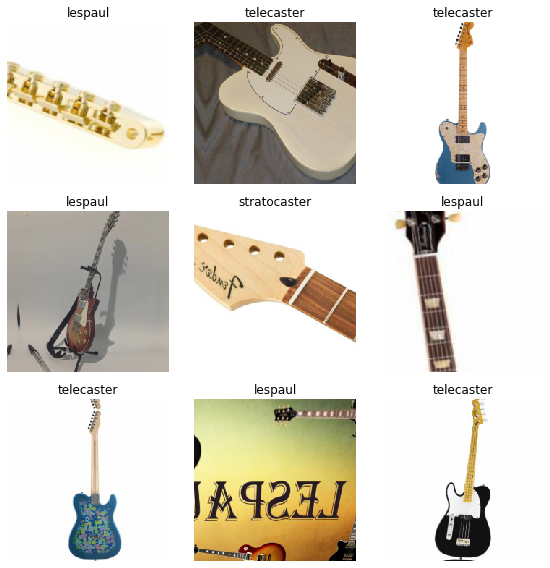

In [41]:
data.show_batch(rows=3, figsize=(8,8))

In [42]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['lespaul', 'stratocaster', 'telecaster'], 3, 915, 228)

In [43]:
learn = cnn_learner(data, models.resnet34, metrics=[accuracy])

In [44]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,1.272106,0.683429,0.706140,01:38
1,0.896315,0.496292,0.837719,01:52
2,0.712075,0.475991,0.837719,01:54


OSError: [Errno 12] Cannot allocate memory

In [ ]:
learn.save('stage-1a')

In [ ]:
learn.load('stage-1a')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find(stop_div=False, num_it=15)

In [ ]:
learn.recorder.plot(suggestion=True)